In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

###Geographic Segmentations

In [178]:
dg1 = pd.read_excel('data1.xlsx')

In [179]:
dg1.head()

,Sl No,State/UT,Total Vehicles Registered,Total Electric Vehicles Registered,Percentage of Electric Vehicles
0,1,Andaman & Nicobar Islands,160375,186,0.12
1,2,Andhra Pradesh,16517516,66500,0.40
2,3,Arunachal Pradesh,299371,25,0.01
3,4,Assam,5393542,116605,2.16
4,5,Bihar,11728184,155457,1.33


In [180]:
dg1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Sl No                               34 non-null     int64  
 1   State/UT                            34 non-null     object 
 2   Total Vehicles Registered           34 non-null     int64  
 3   Total Electric Vehicles Registered  34 non-null     int64  
 4   Percentage of Electric Vehicles     34 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.5+ KB


In [181]:
dg1.shape

(34, 5)

In [182]:
dg1.isnull().sum()

Sl No                                 0
State/UT                              0
Total Vehicles Registered             0
Total Electric Vehicles Registered    0
Percentage of Electric Vehicles       0
dtype: int64

In [183]:
dg1.describe()

,Sl No,Total Vehicles Registered,Total Electric Vehicles Registered,Percentage of Electric Vehicles
count,34.000000,3.400000e+01,34.000000,34.000000
mean,17.500000,1.000025e+07,80706.441176,0.662941
std,9.958246,1.160720e+07,115981.864158,0.647272
min,1.000000,4.375700e+04,20.000000,0.010000
25%,9.250000,5.933925e+05,1489.000000,0.167500
50%,17.500000,6.225248e+06,41790.500000,0.515000
75%,25.750000,1.614329e+07,111040.250000,0.890000
max,34.000000,4.394323e+07,556629.000000,2.710000


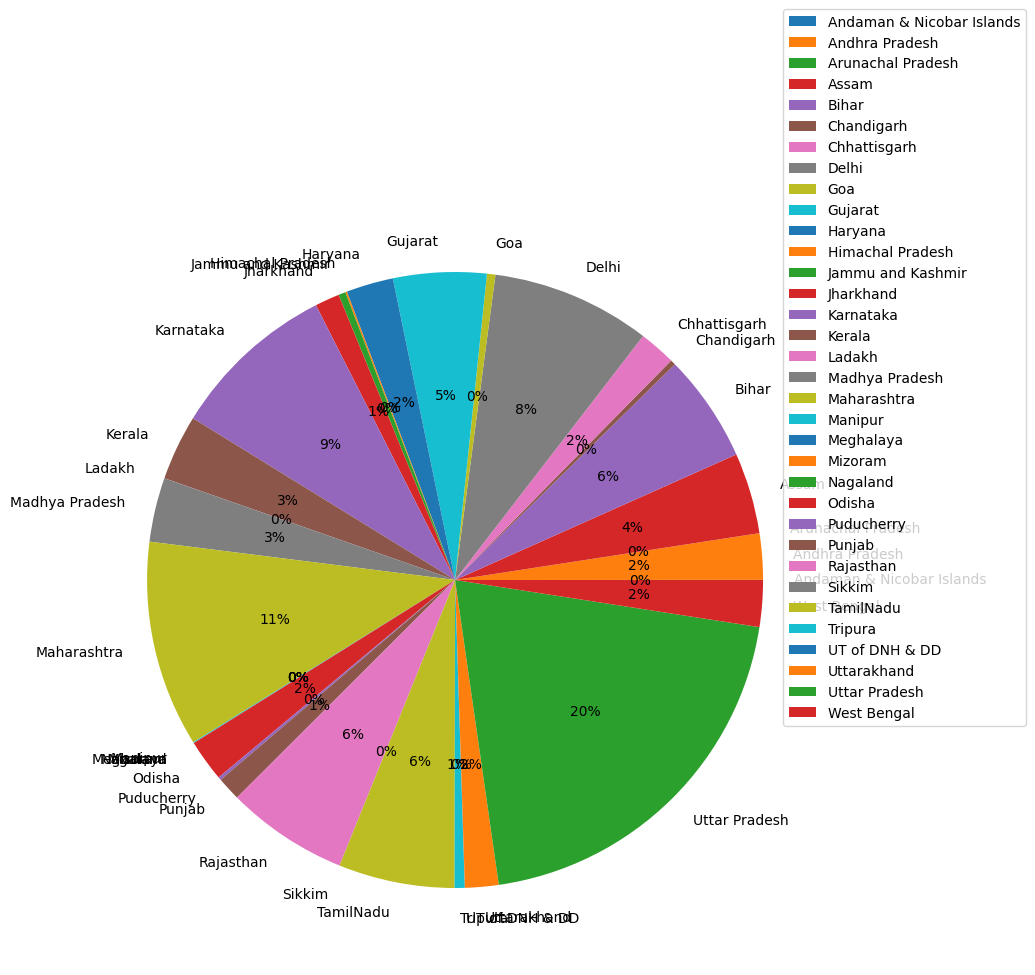

In [184]:
plt.figure(figsize = (10,10))
plt.pie(dg1["Total Electric Vehicles Registered"], labels = dg1["State/UT"], autopct='%.0f%%')
plt.legend( loc ="upper right", bbox_to_anchor =(1.25, 1.25))
plt.show()

UP, Maharashtra and Karnataka has the highest number of electric vehicles in the country

In [185]:
dg1.sort_values(['Total Electric Vehicles Registered'], ascending=False).head(10)

,Sl No,State/UT,Total Vehicles Registered,Total Electric Vehicles Registered,Percentage of Electric Vehicles
32,33,Uttar Pradesh,43943230,556629,1.27
18,19,Maharashtra,34371551,296885,0.86
14,15,Karnataka,29855843,239948,0.80
7,8,Delhi,8457200,229305,2.71
26,27,Rajasthan,18914170,175595,0.93
28,29,TamilNadu,31643747,167216,0.53
4,5,Bihar,11728184,155457,1.33
9,10,Gujarat,22799866,134273,0.59
3,4,Assam,5393542,116605,2.16
15,16,Kerala,16643512,94346,0.57


In [186]:
dg2 = pd.read_csv('/content/RS_Session_259_AU_2028_B.ii__data_gov_in.csv', encoding='cp1252')

In [187]:
dg2

,Sl. No,Category,Expressways/Highways,EV Charging Stations Sanctioned
0,1,Expressways,Mumbai - Pune,10
1,2,Expressways,Ahmadabad - Vadodara,10
2,3,Expressways,Delhi Agra Yamuna,20
3,4,Expressways,Bengaluru Mysore,14
4,5,Expressways,Bangaluru-Chennai,30
5,6,Expressways,Surat-Mumbai,30
6,7,Expressways,Agra-Lucknow,40
7,8,Expressways,Eastern Peripheral (A),14
8,9,Expressways,Hyderabad ORR,16
9,1,Highways,Delhi - Srinagar,80


In [188]:
dg2.drop(dg2.tail().index,inplace=True)  # Removing last row

In [189]:
dg2.columns

Index(['Sl. No', 'Category', 'Expressways/Highways',
       'EV Charging Stations Sanctioned'],
      dtype='object')

In [190]:
dg2.sort_values(['EV Charging Stations Sanctioned'], ascending=False).head(5)

,Sl. No,Category,Expressways/Highways,EV Charging Stations Sanctioned
10,2,Highways,Delhi – Kolkata,160
13,5,Highways,Mumbai - Delhi,124
18,10,Highways,Kolkata - Nagpur,120
20,12,Highways,Chennai-Bhubaneswar,120
16,8,Highways,Mumbai - Bengaluru,100


Highways are having highest number of EV charging stations

In [191]:
Expressway_df = dg2.groupby('Category').get_group('Expressways')
Expressway_df

,Sl. No,Category,Expressways/Highways,EV Charging Stations Sanctioned
0,1,Expressways,Mumbai - Pune,10
1,2,Expressways,Ahmadabad - Vadodara,10
2,3,Expressways,Delhi Agra Yamuna,20
3,4,Expressways,Bengaluru Mysore,14
4,5,Expressways,Bangaluru-Chennai,30
5,6,Expressways,Surat-Mumbai,30
6,7,Expressways,Agra-Lucknow,40
7,8,Expressways,Eastern Peripheral (A),14
8,9,Expressways,Hyderabad ORR,16


In [192]:
Expressway_df.drop(columns=['Category'], inplace=True)
Expressway_df.rename(columns = {'Expressways/Highways':'Expressway Name'}, inplace = True)
Expressway_df

<ipython-input-192-88eee55bdb35>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Expressway_df.drop(columns=['Category'], inplace=True)
<ipython-input-192-88eee55bdb35>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Expressway_df.rename(columns = {'Expressways/Highways':'Expressway Name'}, inplace = True)


,Sl. No,Expressway Name,EV Charging Stations Sanctioned
0,1,Mumbai - Pune,10
1,2,Ahmadabad - Vadodara,10
2,3,Delhi Agra Yamuna,20
3,4,Bengaluru Mysore,14
4,5,Bangaluru-Chennai,30
5,6,Surat-Mumbai,30
6,7,Agra-Lucknow,40
7,8,Eastern Peripheral (A),14
8,9,Hyderabad ORR,16


In [193]:
Highway_df = dg2.groupby('Category').get_group('Highways')

In [194]:
Highway_df.drop(columns=['Category'], inplace=True)
Highway_df.rename(columns = {'Expressways/Highways':'Highway Name'}, inplace = True)
Highway_df

<ipython-input-194-2de7701d065f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Highway_df.drop(columns=['Category'], inplace=True)
<ipython-input-194-2de7701d065f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Highway_df.rename(columns = {'Expressways/Highways':'Highway Name'}, inplace = True)


,Sl. No,Highway Name,EV Charging Stations Sanctioned
9,1,Delhi - Srinagar,80
10,2,Delhi – Kolkata,160
11,3,Agra - Nagpur,80
12,4,Meerut to Gangotri Dham,44
13,5,Mumbai - Delhi,124
14,6,Mumbai-Panaji,60
15,7,Mumbai - Nagpur,70
16,8,Mumbai - Bengaluru,100
17,9,Kolkata - Bhubaneswar,44
18,10,Kolkata - Nagpur,120


In [195]:
def plot_frequency(data,feature1,feature2,x_lbl,y_lbl,text,color):
    """
    This function helps to plot the bar plot for various features

    """
    new_df = data
    new = new_df.sort_values(by=[feature2],ascending=False) # sorting in descending order
    plt.figure(figsize=(14, 8))
    x_state = list(new[feature1].values) # defining x axis
    y_state = list(new[feature2].values) # defining y axis (count of numericl entity)
    plt.barh(x_state,y_state, color = color)
    plt.xlabel(x_lbl, fontsize=18) # xlabel
    plt.ylabel(y_lbl, fontsize=18) # ylabel
    plt.title(text, fontsize = 18)
    return plt.show()

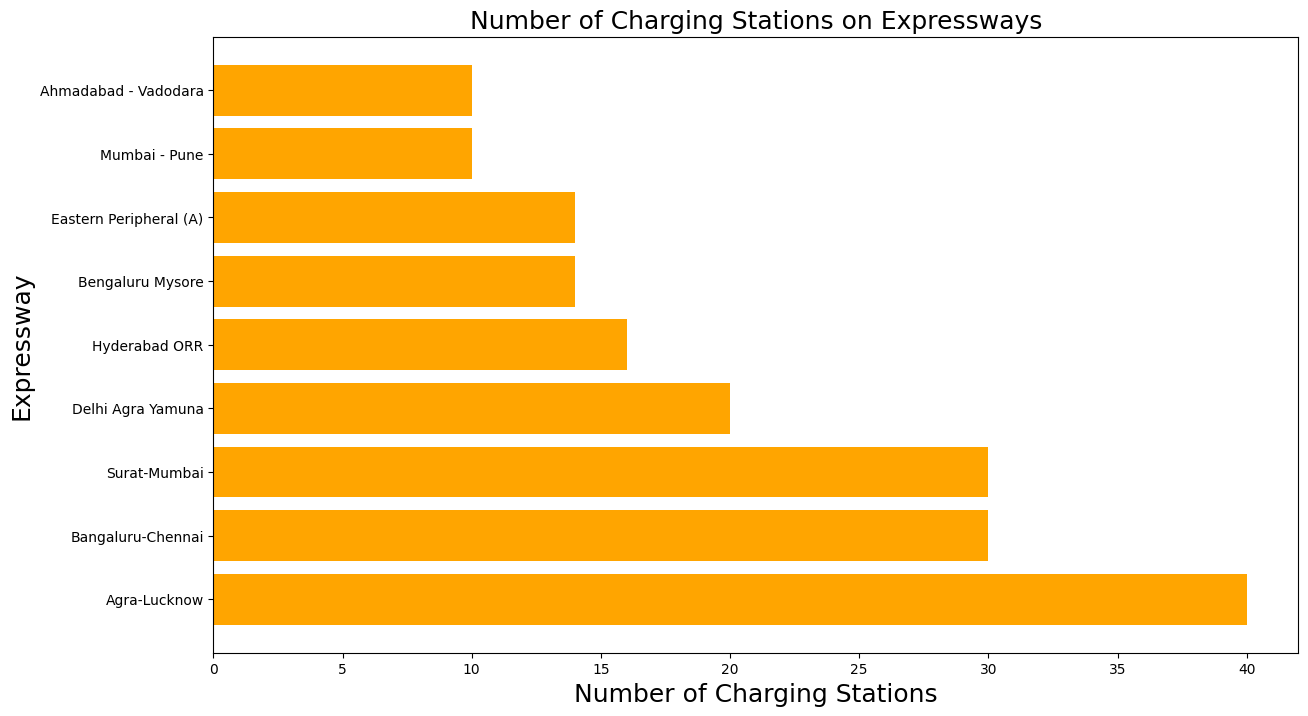

In [196]:
plot_frequency(Expressway_df,"Expressway Name","EV Charging Stations Sanctioned", "Number of Charging Stations",
               "Expressway","Number of Charging Stations on Expressways",'orange')

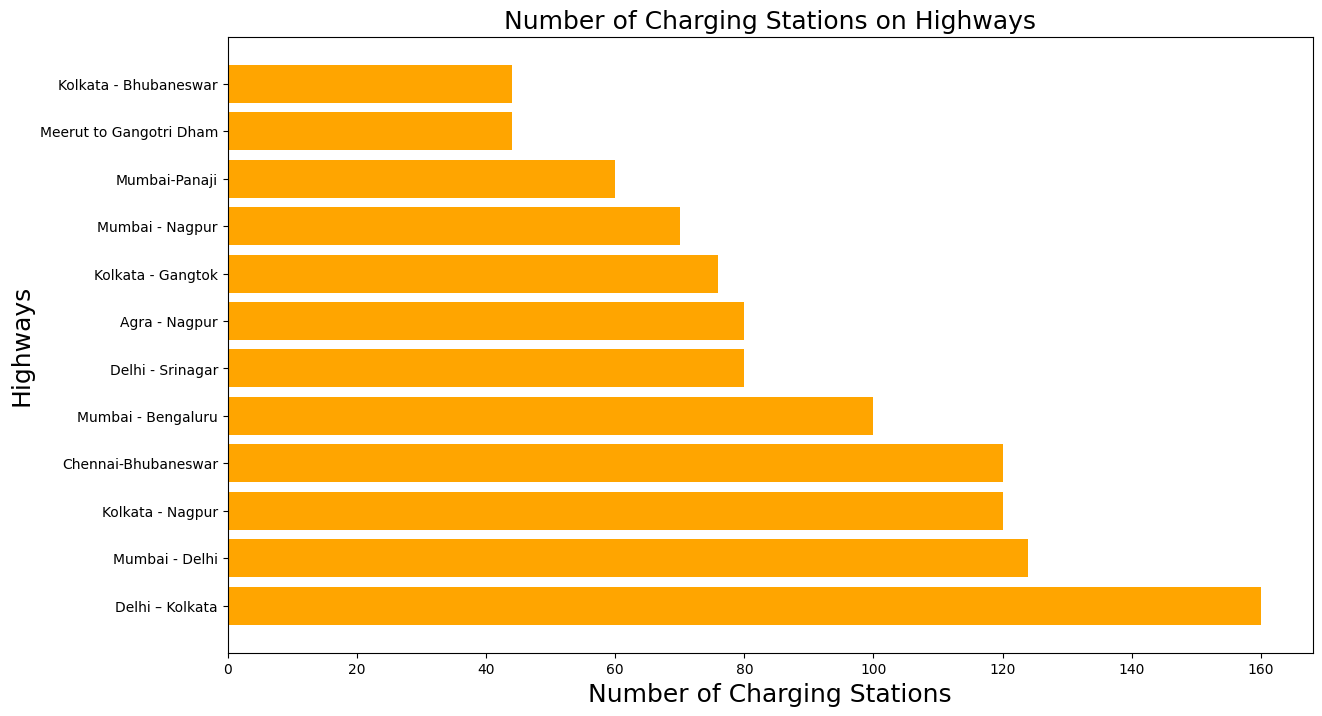

In [197]:
plot_frequency(Highway_df,"Highway Name","EV Charging Stations Sanctioned", "Number of Charging Stations",
               "Highways","Number of Charging Stations on Highways",'orange')

Based on number of charging stations, the following city / state could be targeted

*   Mumbai (Maharashtra)
*   Nagpur (Maharashtra)
*   Delhi
*   Bengaluru (Karnataka)
*   Agra (Uttar Pradesh)

In [198]:
dg3 = pd.read_csv('/content/RS_Session_258_AU_1241_2.i_data_gov_in.csv')

In [199]:
dg3

,State/UT,No. of Electric Vehicle (EV) Chargers Sanctioned
0,Maharashtra,317
1,Andhra Pradesh,266
2,Tamil Nadu,281
3,Gujarat,278
4,Uttar Pradesh,207
5,Rajasthan,205
6,Karnataka,172
7,Madhya Pradesh,235
8,West Bengal,141
9,Telangana,138


In [200]:
dg3 = dg3.iloc[:-1,:] # discarding the last row

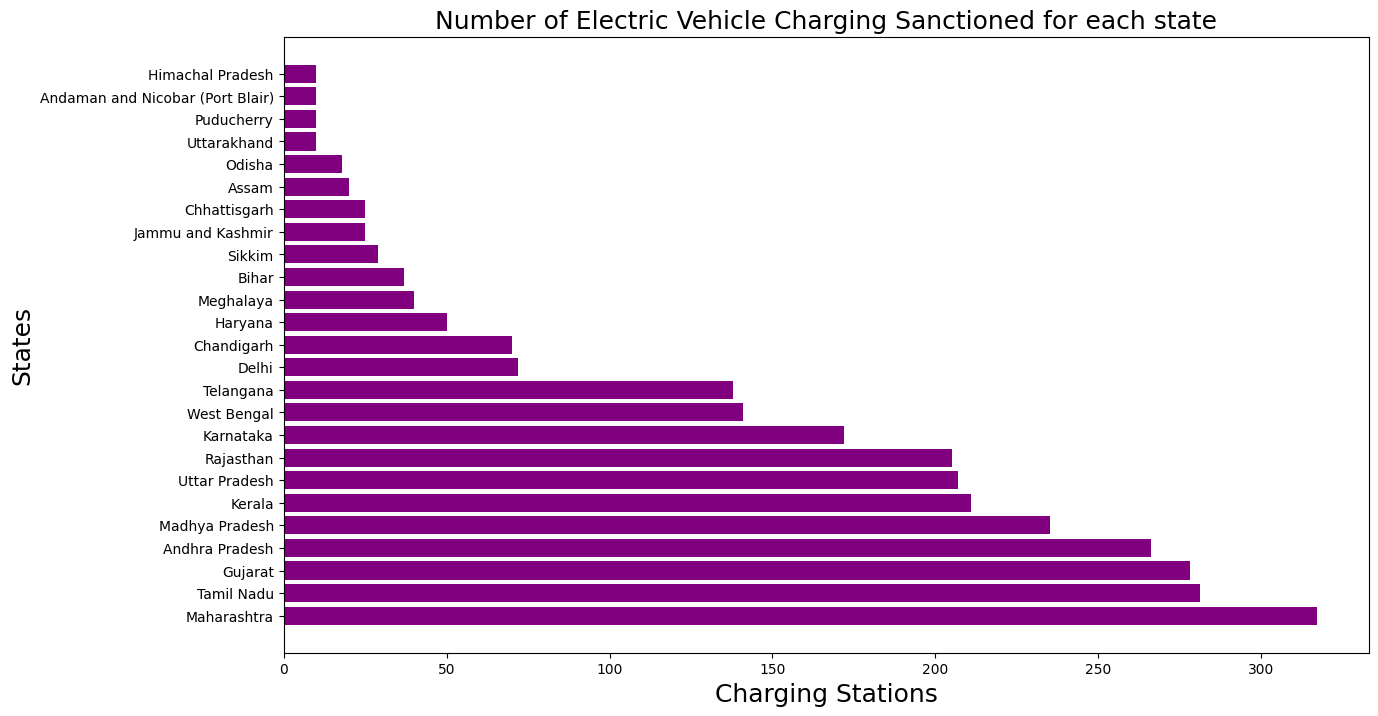

In [201]:
plot_frequency(dg3,"State/UT",'No. of Electric Vehicle (EV) Chargers Sanctioned','Charging Stations','States',
               'Number of Electric Vehicle Charging Sanctioned for each state','purple')

States to target based on charging stations sanctioned

* Maharashtra
* Andhra Pradesh
* Tamil Nadu
* Gujarat
* Rajasthan
* Karnataka

##Demographic Segment

In [202]:
dm1 = pd.read_csv('/content/demographicData.csv')

In [203]:
dm1.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [204]:
dm1.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [205]:
dm1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB


In [206]:
dm1.shape

(99, 13)

In [207]:
dm1.isnull().any()

Age                 False
Profession          False
Marrital Status     False
Education           False
No of Dependents    False
Personal loan       False
House Loan          False
Wife Working        False
Salary              False
Wife Salary         False
Total Salary        False
Make                False
Price               False
dtype: bool

In [208]:
dm1.describe()

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,1.736364e+06,5.343434e+05,2.270707e+06,1.194040e+06
std,6.246054,1.335265,6.736217e+05,6.054450e+05,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,0.000000e+00,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.300000e+06,0.000000e+00,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,1.600000e+06,5.000000e+05,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.200000e+06,9.000000e+05,2.700000e+06,1.500000e+06
max,51.000000,4.000000,3.800000e+06,2.100000e+06,5.200000e+06,3.000000e+06


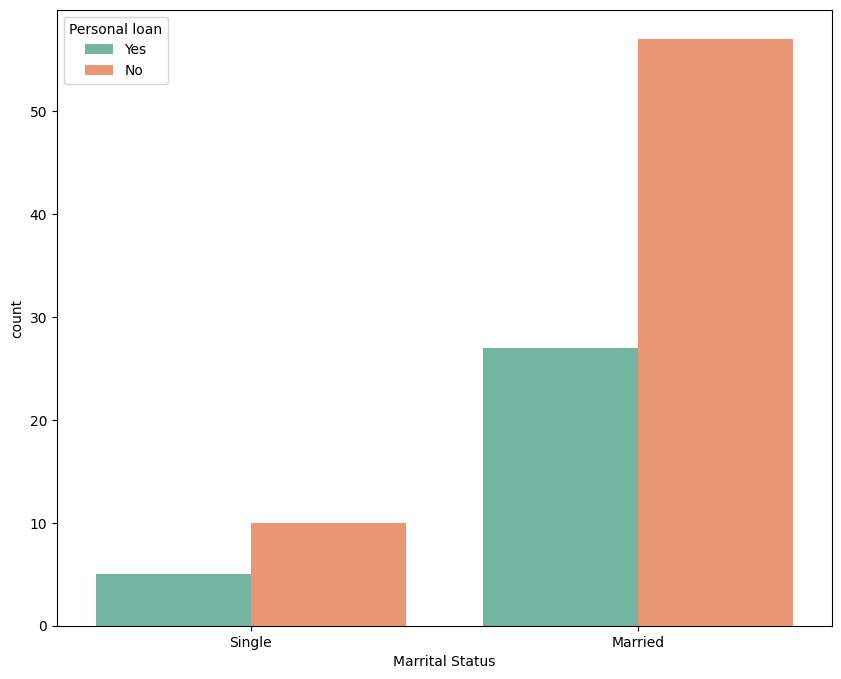

In [209]:
# Plotting the Car loan status with respect to Marrital Status
sns.countplot(x ='Marrital Status', hue = 'Personal loan',  data = dm1, palette = 'Set2')
plt.show()

In [210]:
#How many percentage of person are married
import math
a =(dm1['Marrital Status'].value_counts()['Married'])/((dm1['Marrital Status'].value_counts()['Married'])+(dm1['Marrital Status'].value_counts()['Single']))*100
print(math.floor(a),'%')

84 %


In [211]:
dm1.rename(columns={'Personal loan':'Car_Loan'},inplace=True)
dm1.rename(columns={'Price':'EV_Price'},inplace=True)

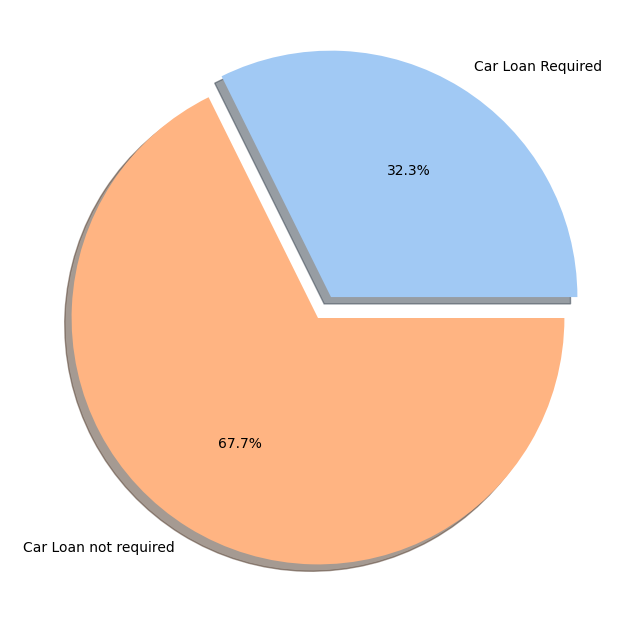

In [212]:
labels = ['Car Loan Required','Car Loan not required']
Loan_status = [dm1.query('Car_Loan == "Yes"').Car_Loan.count(),dm1.query('Car_Loan == "No"').Car_Loan.count()]

explode = [0.1, 0]
palette_color = sns.color_palette('pastel')

plt.pie(Loan_status, labels=labels, colors=palette_color, shadow = "True",
        explode=explode, autopct='%1.1f%%')

plt.show()

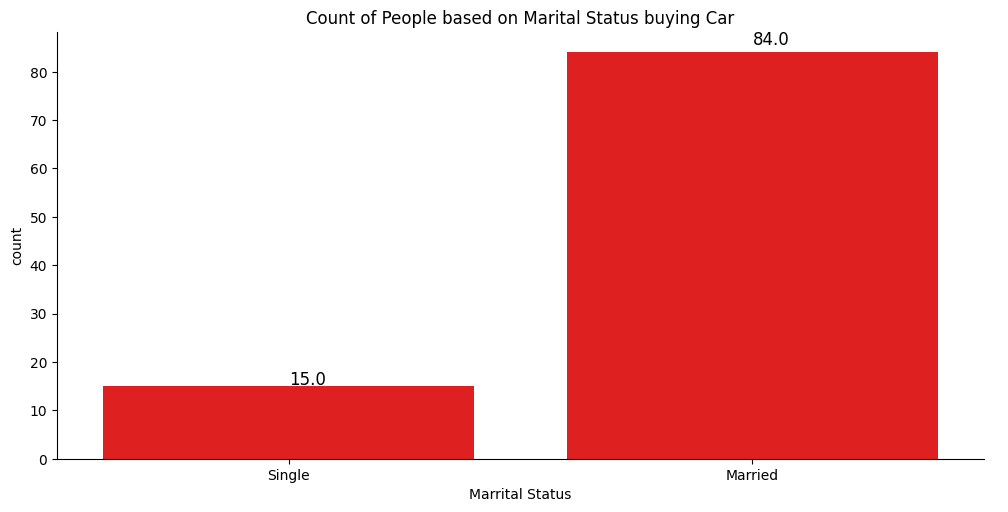

In [213]:
g = sns.catplot(x = "Marrital Status", data=dm1, aspect=2, kind="count", color='r')

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,
            p.get_height() * 1.02,
            format(p.get_height()),
            color='black', rotation='horizontal', size='large')
plt.title('Count of People based on Marital Status buying Car', color='black')
plt.show()

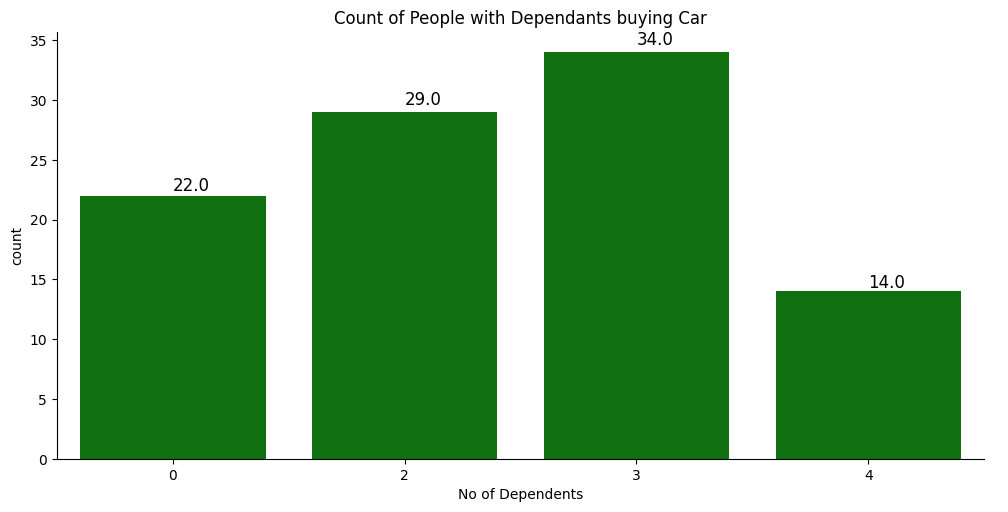

In [214]:
g = sns.catplot(x = "No of Dependents", data=dm1, aspect=2, kind="count", color='g')

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,
            p.get_height() * 1.02,
            format(p.get_height()),
            color='black', rotation='horizontal', size='large')
plt.title('Count of People with Dependants buying Car', color='black')
plt.show()

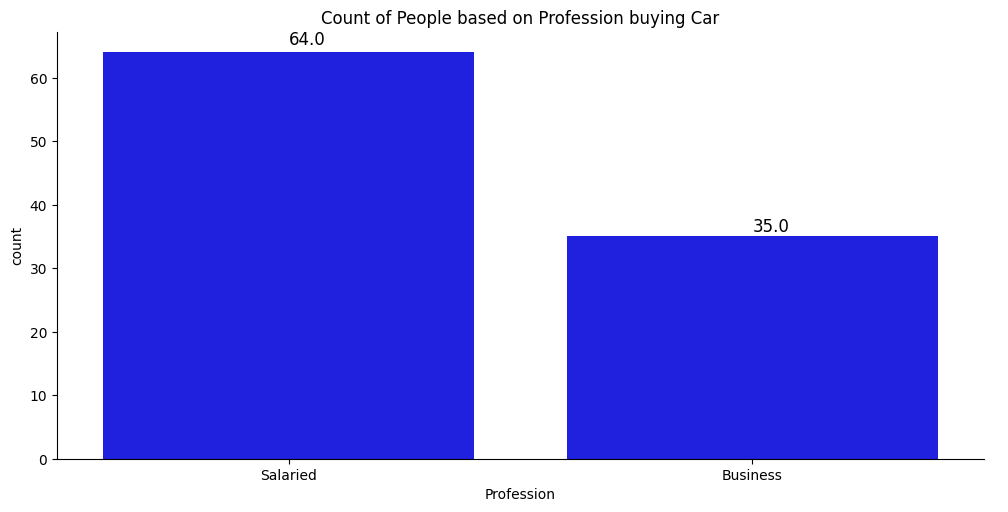

In [215]:
g = sns.catplot(x = "Profession", data=dm1, aspect=2, kind="count", color='b')

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,
            p.get_height() * 1.02,
            format(p.get_height()),
            color='black', rotation='horizontal', size='large')
plt.title('Count of People based on Profession buying Car', color='black')
plt.show()

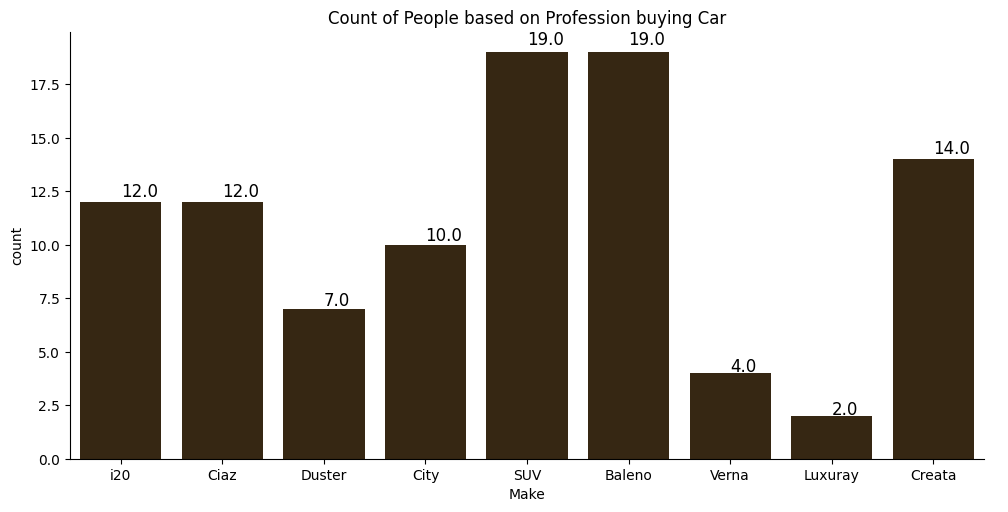

In [216]:
g = sns.catplot(x = "Make", data=dm1, aspect=2, kind="count", color='#3C280D')

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,
            p.get_height() * 1.02,
            format(p.get_height()),
            color='black', rotation='horizontal', size='large')
plt.title('Count of People based on Profession buying Car', color='black')
plt.show()

In [217]:
SalaryGroup={}
length=dm1.shape[0]
SalaryGroup['0-5lakh']=round(dm1[(dm1['Total Salary']>=100000)&(dm1['Total Salary']<500000)].shape[0]*100/length,2)
SalaryGroup['5-15lakh']=round(dm1[(dm1['Total Salary']>=500000)&(dm1['Total Salary']<1500000)].shape[0]*100/length,2)
SalaryGroup['15-25lakh']=round(dm1[(dm1['Total Salary']>=1500000)&(dm1['Total Salary']<2500000)].shape[0]*100/length,2)
SalaryGroup['25-35lakh']=round(dm1[(dm1['Total Salary']>=2500000)&(dm1['Total Salary']<3500000)].shape[0]*100/length,2)
SalaryGroup['35-45lakh']=round(dm1[(dm1['Total Salary']>=3500000)&(dm1['Total Salary']<4500000)].shape[0]*100/length,2)
SalaryGroup['45-55lakh']=round(dm1[(dm1['Total Salary']>=4500000)&(dm1['Total Salary']<5500000)].shape[0]*100/length,2)

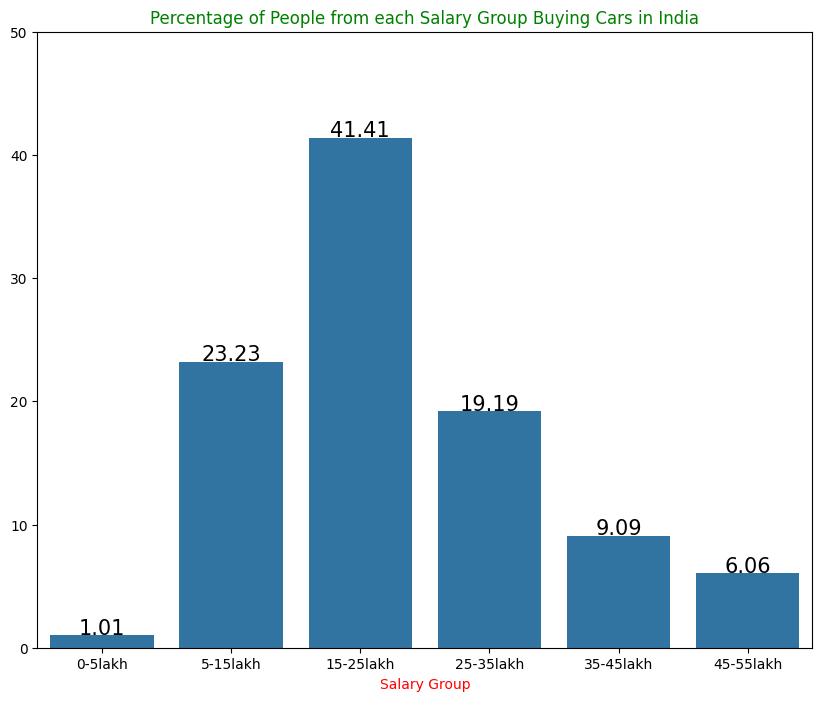

In [218]:
fig,ax=plt.subplots()
plots=sns.barplot(x = list(SalaryGroup.keys()), y = list(SalaryGroup.values()))
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 5),
                   textcoords='offset points')
ax.set_ylim(0,50)
plt.title('Percentage of People from each Salary Group Buying Cars in India', color='green')
plt.xlabel('Salary Group', color='r',)
plt.show()

In [219]:
AgeGroup={}
length=dm1.shape[0]
AgeGroup['25-30']=round(dm1[(dm1['Age']>=25)&(dm1['Age']<30)].shape[0]*100/length,2)
AgeGroup['30-35']=round(dm1[(dm1['Age']>=30)&(dm1['Age']<35)].shape[0]*100/length,2)
AgeGroup['35-40']=round(dm1[(dm1['Age']>=35)&(dm1['Age']<40)].shape[0]*100/length,2)
AgeGroup['40-45']=round(dm1[(dm1['Age']>=40)&(dm1['Age']<45)].shape[0]*100/length,2)
AgeGroup['45-50']=round(dm1[(dm1['Age']>=45)&(dm1['Age']<50)].shape[0]*100/length,2)
AgeGroup['50-55']=round(dm1[(dm1['Age']>=50)&(dm1['Age']<55)].shape[0]*100/length,2)

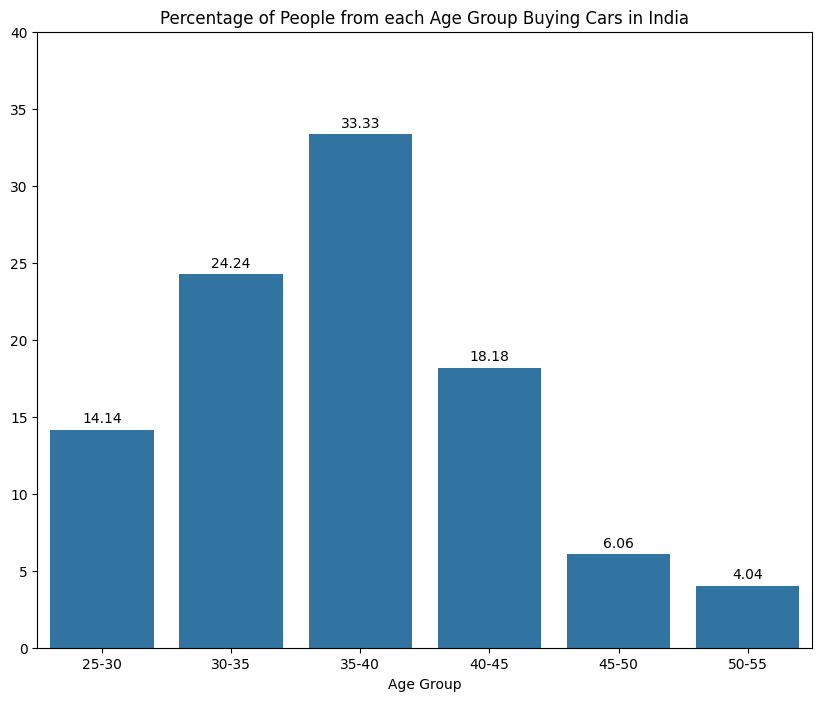

In [220]:
fig,ax=plt.subplots()
plots=sns.barplot(x=list(AgeGroup.keys()),y=list(AgeGroup.values()))
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
ax.set_ylim(0,40)
plt.title('Percentage of People from each Age Group Buying Cars in India')
plt.xlabel('Age Group')
plt.show()

In [221]:
WomenSalaryGroup={}
length=dm1.shape[0]
WomenSalaryGroup['Salaried'] = round(dm1[(dm1['Wife Salary']>0)].shape[0]*100/length,2)
WomenSalaryGroup['Not Salaried'] = round(dm1[(dm1['Wife Salary'] == 0)].shape[0]*100/length,2)

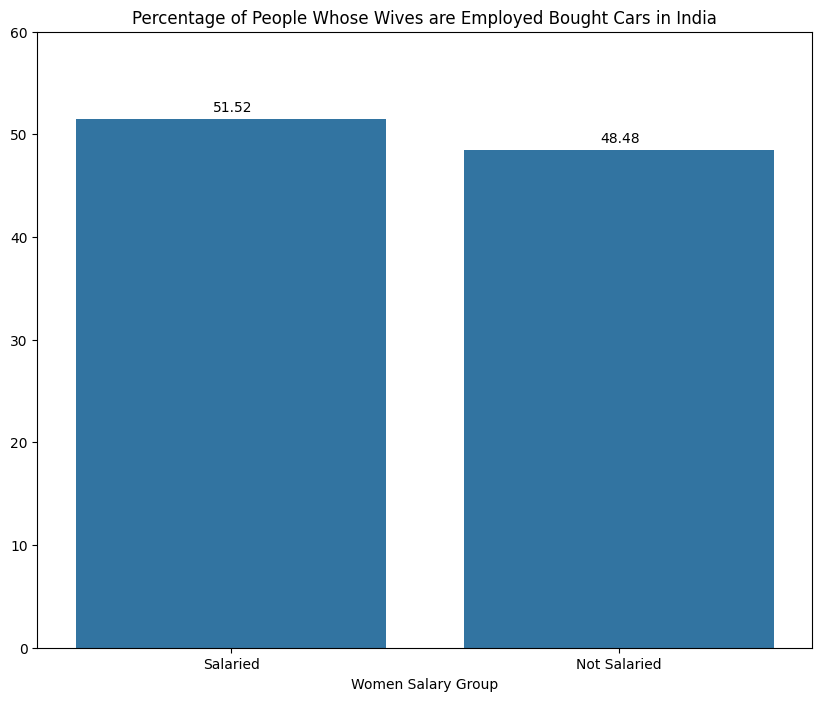

In [222]:
fig,ax=plt.subplots()
plots=sns.barplot(x=list(WomenSalaryGroup.keys()),y=list(WomenSalaryGroup.values()))
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(1, 8),
                   textcoords='offset points')
ax.set_ylim(0,60)
plt.title('Percentage of People Whose Wives are Employed Bought Cars in India')
plt.xlabel('Women Salary Group')
plt.show()

##### Segmentation using K-Means Clustering

In [223]:
dm1['Wife Working'].value_counts()

Wife Working
Yes    52
No     46
m       1
Name: count, dtype: int64

In [224]:
dm1.drop(dm1[dm1['Wife Working'] == 'm'].index, inplace=True)

In [225]:
dm1.shape

(98, 13)

In [226]:
numerical =  dm1.select_dtypes(include=['float64', 'int64'])

In [227]:
label_encoder = preprocessing.LabelEncoder()
categorical = dm1.select_dtypes(include = ["object"])
for cols in categorical:
    # Encode labels in column .
    categorical[cols]= label_encoder.fit_transform(categorical[cols])
    categorical[cols].unique()

In [228]:
X = pd.concat([numerical, categorical], axis=1)

In [229]:
X.dtypes

Age                 int64
No of Dependents    int64
Salary              int64
Wife Salary         int64
Total Salary        int64
EV_Price            int64
Profession          int64
Marrital Status     int64
Education           int64
Car_Loan            int64
House Loan          int64
Wife Working        int64
Make                int64
dtype: object

In [230]:
pca_data = preprocessing.scale(X)
pca = PCA(n_components=12)
pc = pca.fit_transform(X)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12']
pf = pd.DataFrame(data=pc,columns=names)

In [231]:
pca.explained_variance_ratio_

array([8.32790708e-01, 1.27233463e-01, 3.99758288e-02, 1.07823620e-11,
       3.17409564e-12, 5.70074903e-13, 1.26308754e-13, 1.25460230e-13,
       8.59301321e-14, 4.84410030e-14, 3.05387680e-14, 1.53509961e-14])

In [232]:
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = X.columns.values
loadings_df = loadings_df.set_index('variable')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


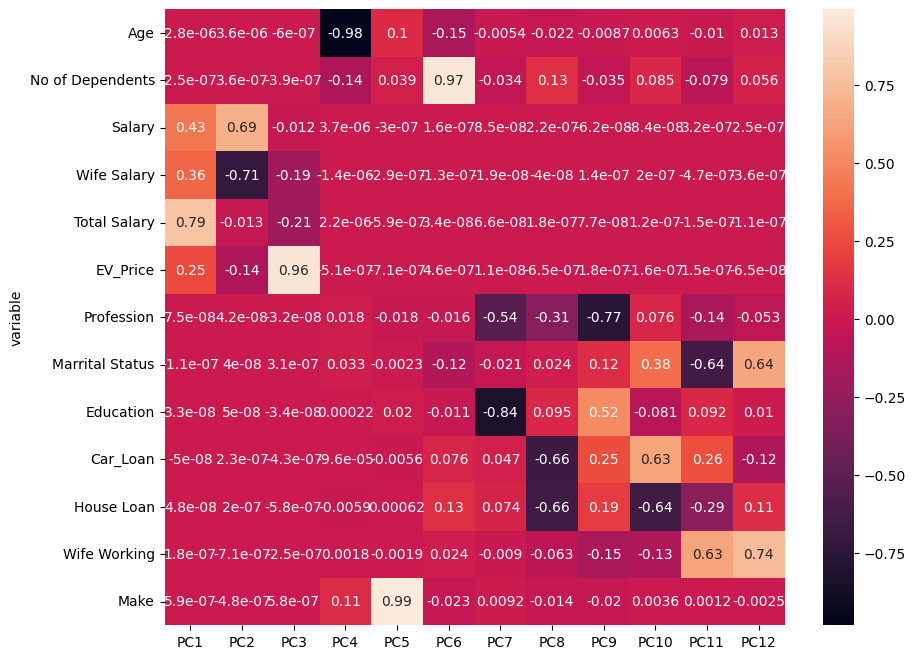

In [233]:
# Heat map for original variables and principal components
plt.rcParams['figure.figsize'] = (10,8)
ax = sns.heatmap(loadings_df, annot=True)
plt.show()

In [234]:
wcss=[]
for i in range(1,11):
    #preventing random initialization: 'init=k-means++'
    kmeans= KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

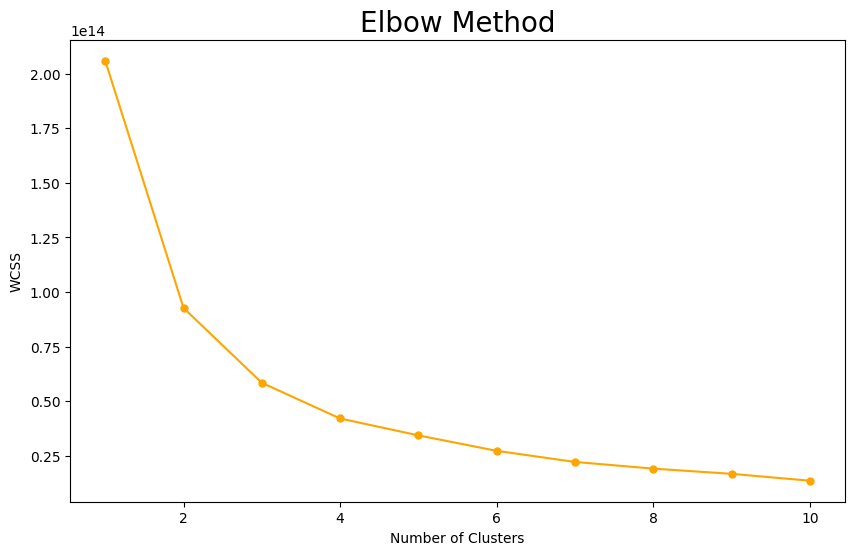

In [235]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss,color='orange', linestyle='solid', marker='o',
          markersize=5)
plt.title('Elbow Method', size=20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

#####Number of clusters = 4

In [236]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(X)
X['cluster'] = kmeans.labels_
print(kmeans.cluster_centers_)

[[3.19459459e+01 1.75675676e+00 1.17297297e+06 1.64864865e+05
  1.33783784e+06 8.57027027e+05 5.40540541e-01 3.51351351e-01
  5.67567568e-01 3.51351351e-01 2.70270270e-01 2.97297297e-01
  3.08108108e+00]
 [3.56153846e+01 2.15384615e+00 1.55769231e+06 8.84615385e+05
  2.44230769e+06 1.38846154e+06 7.30769231e-01 5.55111512e-17
  5.38461538e-01 1.92307692e-01 3.07692308e-01 1.00000000e+00
  3.88461538e+00]
 [4.09500000e+01 2.65000000e+00 2.34000000e+06 1.16415322e-10
  2.34000000e+06 1.18000000e+06 6.00000000e-01 1.00000000e-01
  5.50000000e-01 5.00000000e-01 6.00000000e-01 0.00000000e+00
  3.40000000e+00]
 [4.22000000e+01 2.53333333e+00 2.65333333e+06 1.58666667e+06
  4.24000000e+06 1.74000000e+06 8.00000000e-01 0.00000000e+00
  6.66666667e-01 2.00000000e-01 4.00000000e-01 1.00000000e+00
  4.46666667e+00]]


In [237]:
# Cluster size for the 3 clusters
from collections import Counter
Counter(kmeans.labels_)

Counter({0: 37, 1: 26, 2: 20, 3: 15})

In [238]:
Counter({0: 37, 1: 26, 2: 20, 3: 15})

Counter({0: 37, 1: 26, 2: 20, 3: 15})

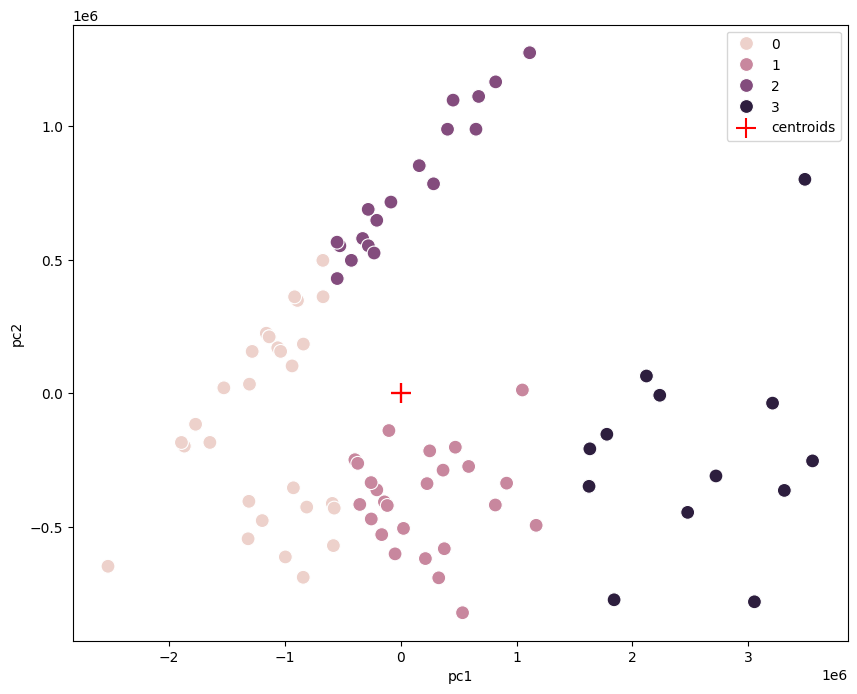

In [239]:
# Visulazing clusters
sns.scatterplot(data=pf, x="pc1", y="pc2", hue=kmeans.labels_,s = 100)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
          marker="+", c="r", s=200, label="centroids")
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/scipy/cluster/hierarchy.py:833: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


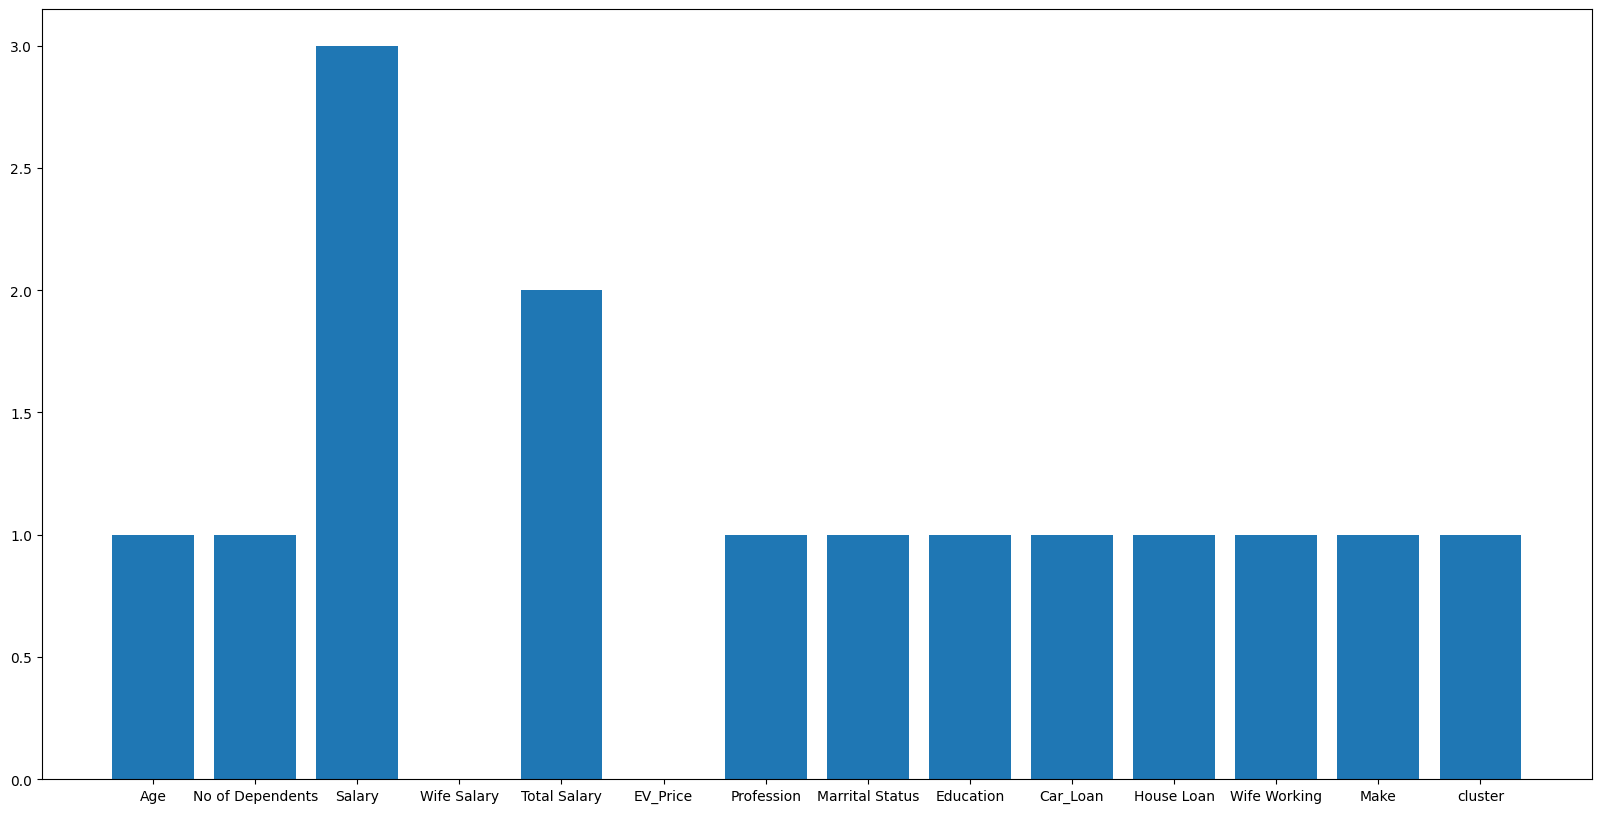

In [240]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy as shc
from sklearn.metrics import pairwise_distances
clust2 = AgglomerativeClustering(n_clusters = 4).fit_predict(pairwise_distances(X.transpose()))
plt.figure(figsize = (20,10))
plt.bar(X.columns,clust2)
plt.show()


From this bar graph we have 4 segments:
Segment0 = Wife salary, Price
Segment1 = Age, No of dependants, Profession, Marritial Status, Education, Personal Loan, House Loan, Wife Working, Make, cluster
Segment 2 =Total Salary
Segment 3 = Salary


Salary forms the major contributor in Purchasing Car

In [241]:
dm1['Clusters'] = X['cluster']

In [242]:
newdf = dm1.groupby('Clusters')

In [243]:
newdf.get_group(0)

,Age,Profession,Marrital Status,Education,No of Dependents,Car_Loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,EV_Price,Clusters
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000,0
5,28,Salaried,Married,Graduate,3,Yes,Yes,No,900000,0,900000,Baleno,700000,0
6,31,Salaried,Married,Graduate,4,No,No,Yes,1200000,600000,1800000,City,1200000,0
7,33,Business,Married,Post Graduate,4,No,No,No,1400000,0,1400000,Baleno,700000,0
9,34,Salaried,Married,Graduate,3,Yes,Yes,Yes,1200000,700000,1900000,i20,800000,0
12,29,Salaried,Married,Post Graduate,0,No,No,Yes,900000,800000,1700000,Verna,110000,0
13,30,Business,Single,Post Graduate,2,Yes,No,No,1400000,0,1400000,i20,800000,0
14,31,Business,Married,Graduate,3,Yes,Yes,Yes,900000,400000,1300000,Baleno,700000,0
16,26,Salaried,Single,Post Graduate,0,No,No,No,800000,0,800000,i20,800000,0
17,27,Salaried,Single,Graduate,0,Yes,No,Yes,800000,0,800000,Baleno,700000,0


In [244]:
cluster0 = newdf.get_group(0)

In [245]:
cluster0

,Age,Profession,Marrital Status,Education,No of Dependents,Car_Loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,EV_Price,Clusters
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000,0
5,28,Salaried,Married,Graduate,3,Yes,Yes,No,900000,0,900000,Baleno,700000,0
6,31,Salaried,Married,Graduate,4,No,No,Yes,1200000,600000,1800000,City,1200000,0
7,33,Business,Married,Post Graduate,4,No,No,No,1400000,0,1400000,Baleno,700000,0
9,34,Salaried,Married,Graduate,3,Yes,Yes,Yes,1200000,700000,1900000,i20,800000,0
12,29,Salaried,Married,Post Graduate,0,No,No,Yes,900000,800000,1700000,Verna,110000,0
13,30,Business,Single,Post Graduate,2,Yes,No,No,1400000,0,1400000,i20,800000,0
14,31,Business,Married,Graduate,3,Yes,Yes,Yes,900000,400000,1300000,Baleno,700000,0
16,26,Salaried,Single,Post Graduate,0,No,No,No,800000,0,800000,i20,800000,0
17,27,Salaried,Single,Graduate,0,Yes,No,Yes,800000,0,800000,Baleno,700000,0


In [246]:
cluster0.corr(numeric_only=True)

,Age,No of Dependents,Salary,Wife Salary,Total Salary,EV_Price,Clusters
Age,1.000000,0.674381,0.405010,0.012350,0.373348,-0.103695,NaN
No of Dependents,0.674381,1.000000,0.184315,0.136444,0.267461,-0.135655,NaN
Salary,0.405010,0.184315,1.000000,-0.271776,0.696425,0.146401,NaN
Wife Salary,0.012350,0.136444,-0.271776,1.000000,0.501348,-0.185747,NaN
Total Salary,0.373348,0.267461,0.696425,0.501348,1.000000,-0.006884,NaN
EV_Price,-0.103695,-0.135655,0.146401,-0.185747,-0.006884,1.000000,NaN
Clusters,NaN,NaN,NaN,NaN,NaN,NaN,NaN


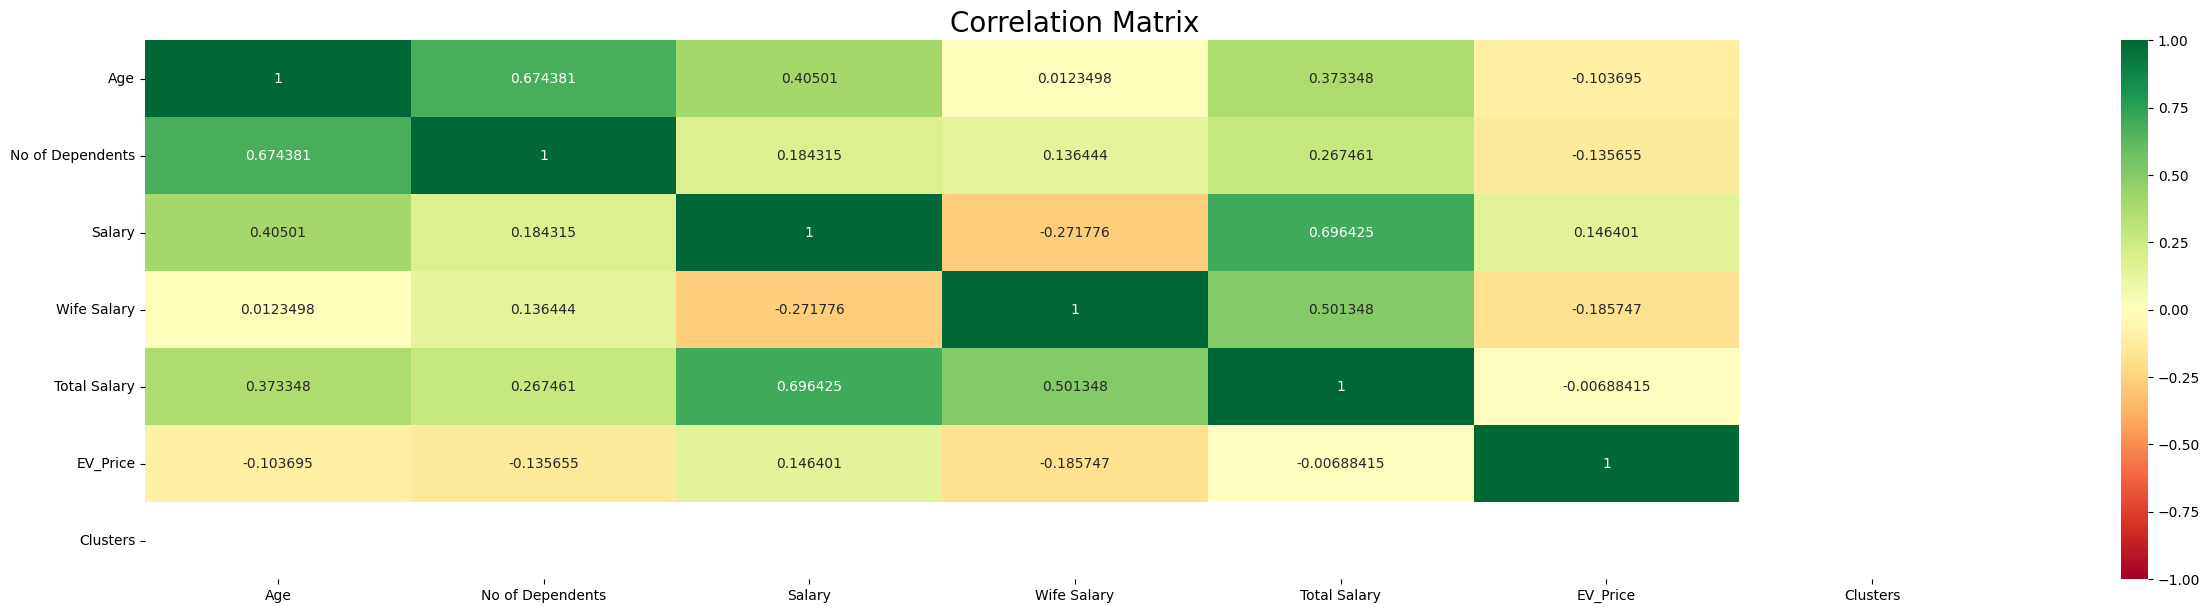

In [247]:
# Correlation Matrix Plotting
plt.figure(figsize=(30,7))
plt.title("Correlation Matrix", fontsize=20)

sns.heatmap(cluster0.corr(numeric_only=True),cmap='RdYlGn',annot=True,vmax=1.0,vmin=-1.0,fmt='g')
#cmap is the color for heatmap, annot=True is to show the correlation matrix value on heatmap
#vmax and vmin are the threshold for the heatmap and fmt will create a scale
plt.show()

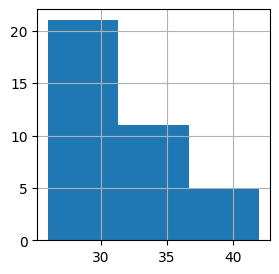

In [248]:
plt.figure(figsize=(3, 3))
hist = cluster0['Age'].hist(bins=3)
plt.show()

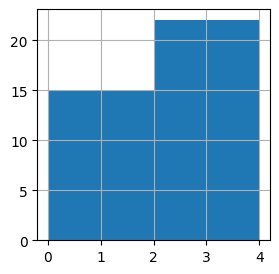

In [249]:
plt.figure(figsize=(3, 3))
hist = cluster0['No of Dependents'].hist(bins=2)
plt.show()

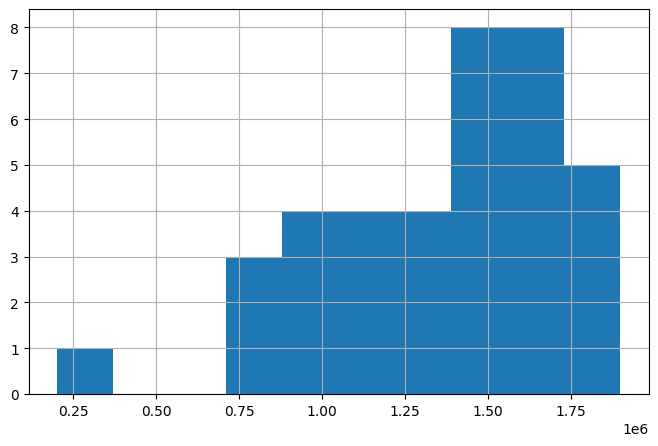

In [250]:
plt.figure(figsize=(8, 5))
hist = cluster0['Total Salary'].hist(bins=10)
plt.show()


People from age group 25-31 with no of dependants > 2 and salary between 13 lakhs and 17 lakhs are buying cars

###Car Type Behavioural Analysis

In [251]:
dt1 = pd.read_csv('/content/EVIndia_Kaggle.csv')

In [252]:
dt1

,Car,Style,Range,Transmission,VehicleType,PriceRange,Capacity,BootSpace,BaseModel,TopModel
0,Tata Nexon EV,Compact SUV,312 Km/Full Charge,Automatic,Electric,₹ 13.99 - 17.4 L,5 Seater,350 L,XM,Dark XZ Plus LUX
1,Tata Tigor EV,Subcompact Sedan,306 Km/Full Charge,Automatic,Electric,₹ 12.49 - 13.64 L,5 Seater,316 L,XE,XZ Plus Dual Tone
2,Tata Nexon EV Max,Compact SUV,437 Km/Full Charge,Automatic,Electric,₹ 17.74 - 19.24 L,5 Seater,350 L,XZ Plus 3.3 kW,XZ Plus Lux 7.2 kW
3,MG ZS EV,Compact SUV,419 Km/Full Charge,Automatic,Electric,₹ 21.99 - 25.88 L,5 Seater,448 L,Excite,Exclusive
4,Hyundai Kona Electric,Compact SUV,452 Km/Full Charge,Automatic,Electric,₹ 23.79 - 23.98 L,5 Seater,na,Premium Dual Tone,HSE
5,Jaguar I-Pace,Premium Midsize Sedan,470 Km/Full Charge,Automatic,Electric,₹ 1.06 - 1.12 Cr,5 Seater,656 L,S,Sportback 55
6,Audi E-Tron GT,Premium Coupe,388 Km/Full Charge,Automatic,Electric,₹ 1.8 Cr,5 Seater,405 L,Quattro,na
7,BYD E6,Subcompact MPV,415 Km/Full Charge,Automatic,Electric,₹ 29.15 L,5 Seater,580 L,STD,na
8,Mercedes-Benz EQC,Compact SUV,471 Km/Full Charge,Automatic,Electric,₹ 1 Cr,5 Seater,na,na,na
9,BMW iX,Premium Fullsize SUV,425 Km/Full Charge,Automatic,Electric,₹ 1.16 Cr,5 Seater,na,na,na


In [253]:
dt1.head()

,Car,Style,Range,Transmission,VehicleType,PriceRange,Capacity,BootSpace,BaseModel,TopModel
0,Tata Nexon EV,Compact SUV,312 Km/Full Charge,Automatic,Electric,₹ 13.99 - 17.4 L,5 Seater,350 L,XM,Dark XZ Plus LUX
1,Tata Tigor EV,Subcompact Sedan,306 Km/Full Charge,Automatic,Electric,₹ 12.49 - 13.64 L,5 Seater,316 L,XE,XZ Plus Dual Tone
2,Tata Nexon EV Max,Compact SUV,437 Km/Full Charge,Automatic,Electric,₹ 17.74 - 19.24 L,5 Seater,350 L,XZ Plus 3.3 kW,XZ Plus Lux 7.2 kW
3,MG ZS EV,Compact SUV,419 Km/Full Charge,Automatic,Electric,₹ 21.99 - 25.88 L,5 Seater,448 L,Excite,Exclusive
4,Hyundai Kona Electric,Compact SUV,452 Km/Full Charge,Automatic,Electric,₹ 23.79 - 23.98 L,5 Seater,na,Premium Dual Tone,HSE


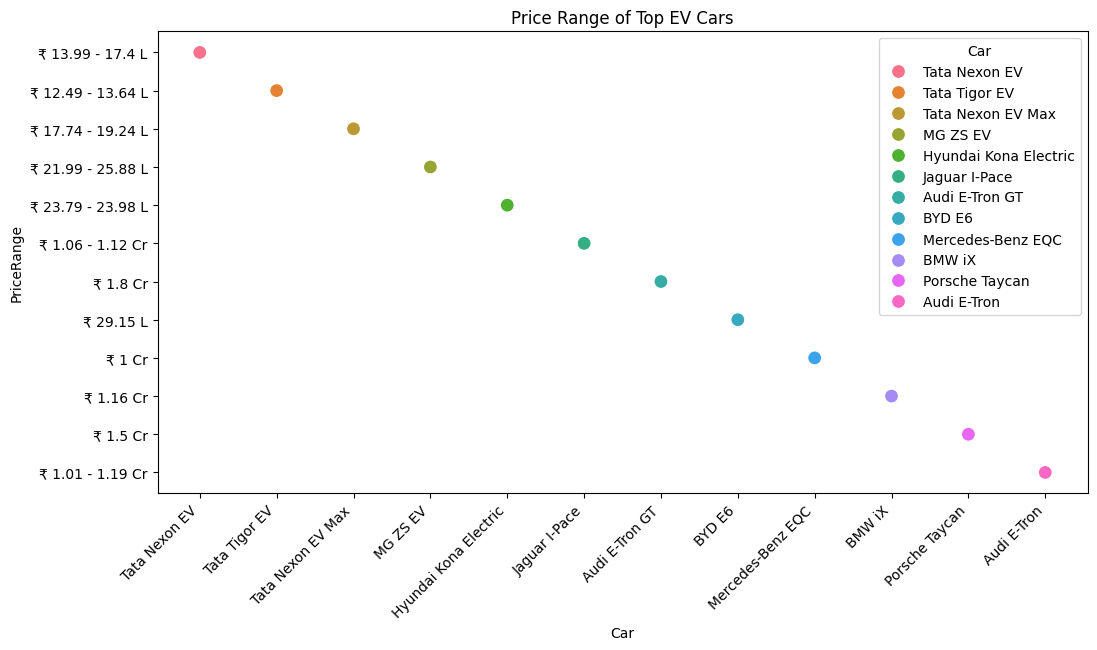

In [254]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Car', y='PriceRange', data=dt1, hue='Car', s=100)
plt.title('Price Range of Top EV Cars')
plt.xticks(rotation=45, ha='right')
plt.show()

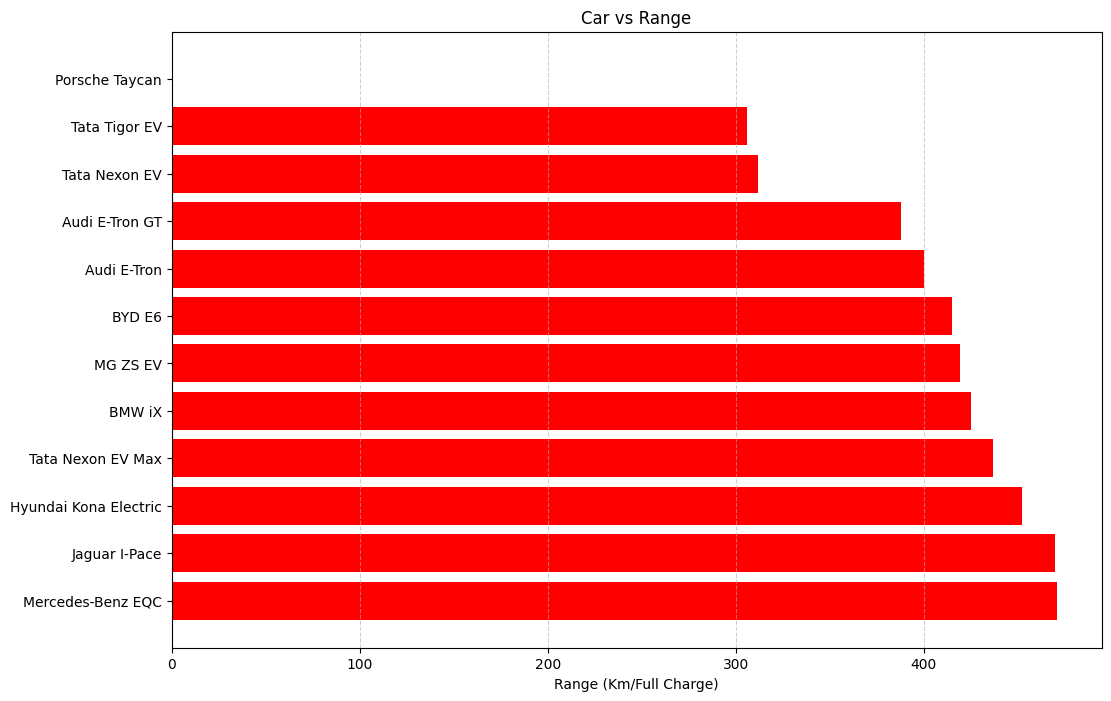

In [255]:
#visualization to compare cars vs range each car and there respective distance covered in each single charge

cars = ["Tata Nexon EV", "Tata Tigor EV", "Tata Nexon EV Max", "MG ZS EV", "Hyundai Kona Electric",
        "Jaguar I-Pace", "Audi E-Tron GT", "BYD E6", "Mercedes-Benz EQC", "BMW iX",
        "Porsche Taycan", "Audi E-Tron"]

ranges = ["312 Km/Full Charge", "306 Km/Full Charge", "437 Km/Full Charge", "419 Km/Full Charge",
          "452 Km/Full Charge", "470 Km/Full Charge", "388 Km/Full Charge", "415 Km/Full Charge",
          "471 Km/Full Charge", "425 Km/Full Charge", "na", "400 Km/Full Charge"]

# Convert the range values to numeric for sorting
numeric_ranges = [int(range_val.split(" ")[0]) if range_val != "na" else 0 for range_val in ranges]

# Sort data based on range
sorted_data = sorted(zip(cars, numeric_ranges), key=lambda x: x[1], reverse=True)

cars, numeric_ranges = zip(*sorted_data)

# Plotting the bar chart
plt.figure(figsize=(12, 8))
plt.barh(cars, numeric_ranges, color='red')
plt.xlabel('Range (Km/Full Charge)')
plt.title('Car vs Range')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

In [256]:
dt2 = pd.read_excel('/content/evcount.xlsx')

In [257]:
dt2

,Sr. No.,State/UT,Total no of Electric Vehicles as on 03.08.2023
0,1,Andaman & Nicobar Island,190
1,2,Andhra Pradesh,67905
2,3,Arunachal Pradesh,28
3,4,Assam,120423
4,5,Bihar,161060
5,6,Chandigarh,7964
6,7,Chhattisgarh,54848
7,8,Delhi,233212
8,9,Goa,12615
9,10,Gujarat,138410


In [258]:
dt2.shape

(35, 3)

In [259]:
dt2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Sr. No.                                         35 non-null     object
 1   State/UT                                        34 non-null     object
 2   Total no of Electric Vehicles as on 03.08.2023  35 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 968.0+ bytes


In [260]:
dt2.isnull().sum()

Sr. No.                                           0
State/UT                                          1
Total no of Electric Vehicles as on 03.08.2023    0
dtype: int64

In [261]:
dt2.drop(dt2.tail().index,inplace=True)  # Removing last row

In [262]:
dt2.describe()

,Total no of Electric Vehicles as on 03.08.2023
count,30.000000
mean,71245.900000
std,86642.155906
min,20.000000
25%,1504.750000
50%,36243.000000
75%,114900.250000
max,305006.000000


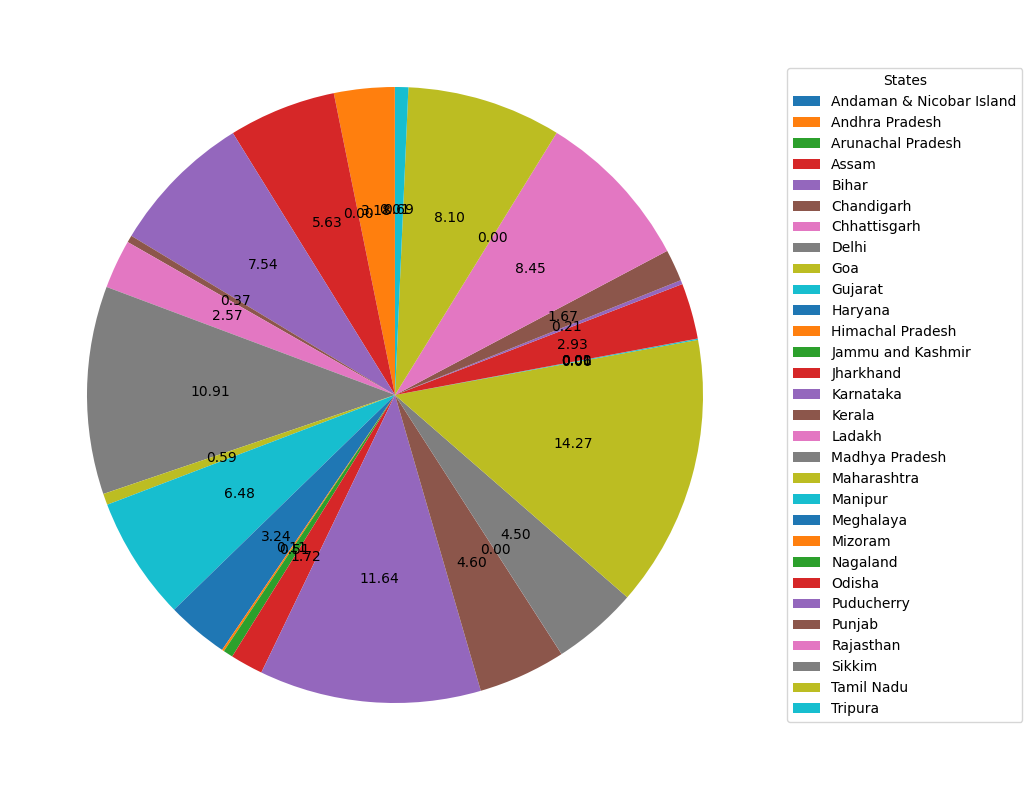

In [263]:
plt.figure(figsize=(10,10))
plt.pie(dt2['Total no of Electric Vehicles as on 03.08.2023'], labels=None, autopct='%0.2f', startangle=90)
plt.legend(dt2['State/UT'], title="States", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

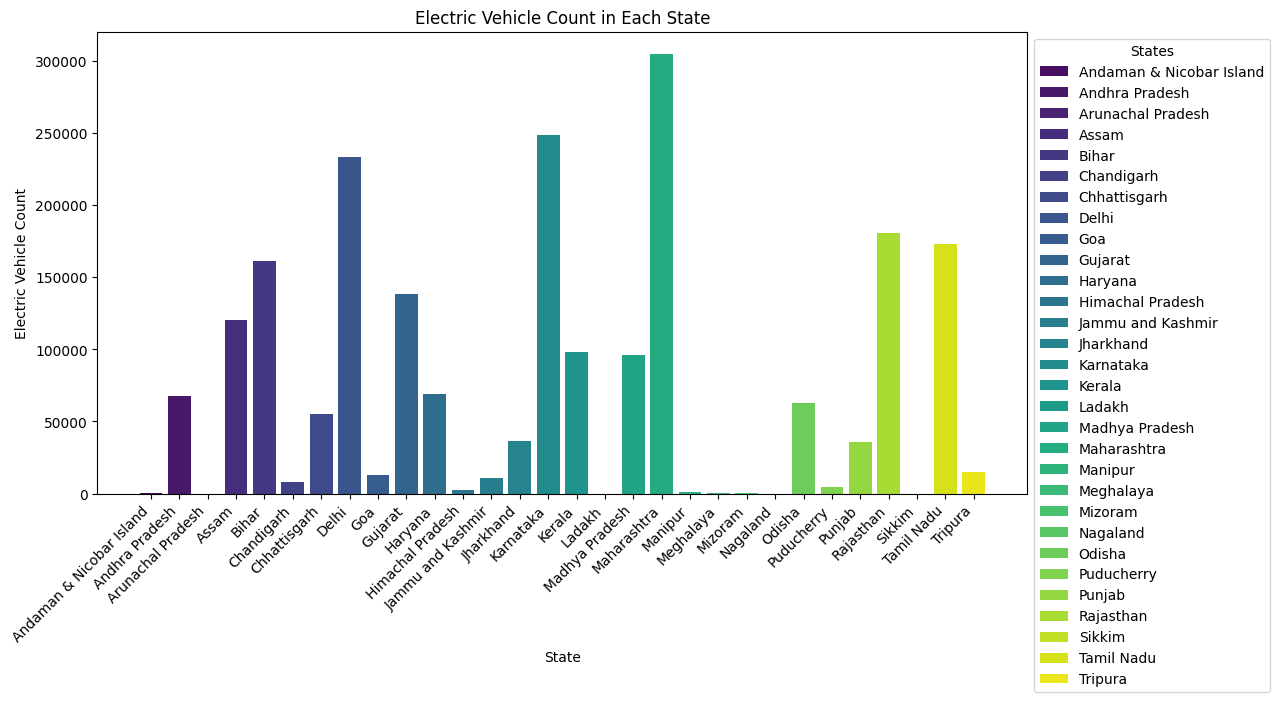

In [264]:
colors = sns.color_palette('viridis', len(dt2))

plt.figure(figsize=(12, 6))
bars = plt.bar(dt2['State/UT'], dt2['Total no of Electric Vehicles as on 03.08.2023'], color=colors)
plt.xlabel('State')
plt.ylabel('Electric Vehicle Count')
plt.title('Electric Vehicle Count in Each State')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Adding a legend for better visualization
plt.legend(bars, dt2['State/UT'], title="States", bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

#Conclusion
According to Demographic, Geographic and Technographic Data we can conclude as states like Maharashtra, Karnataka and UP has scope when it comes to geography. Highways associated to likes of Nagpur, Delhi, Mumbai has most number of EV charging stations with Maharashtra leading the stats. Some interesting outcomes says that 85% car owners are married and also 2/3rd were dependent on loan. Age group of 25-40 were most demanded one and hence most targeted as well. People from age group 25-31 with no of dependants > 2 and salary between 13 lakhs and 17 lakhs are buying cars.

In this way with help of dataset we can generate insights and determine how to tackle market segment and target it with careful and improved strategy.